In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing Data

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv('/content/drive/My Drive/Fraud.csv')

In [43]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Exploratorty Data Analsys


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Checking for Null Values

In [46]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Checking for Duplicates

In [47]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [48]:
df.duplicated().sum()

0

In [49]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

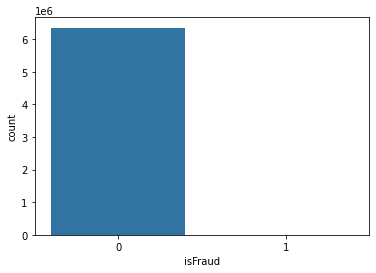

In [50]:
sns.countplot(x ='isFraud', data = df)

Splitting Data

In [51]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns
ndf=df[numerical]

cdf=df[categorical]

In [52]:
ndf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [53]:
cdf

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [54]:
new_dataset_size = 1000000

# Generate random indices
random_indices = np.random.choice(ndf.index, size=new_dataset_size, replace=False)

# Form the new dataset
new_ndf = ndf.loc[random_indices, :]

#As data is too large taking random 1 million values from entire dataset for building model

In [55]:
new_ndf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3678950,276,417075.12,522.0,0.00,5862502.83,6279577.95,0,0
3694111,277,257788.07,0.0,0.00,399542.02,657330.09,0,0
1031268,93,11702.09,423773.0,412070.91,0.00,0.00,0,0
203120,13,256894.68,36929.0,0.00,0.00,256894.68,0,0
1583547,155,12310.84,0.0,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
2147051,184,30017.23,0.0,0.00,889340.98,919358.21,0,0
5163362,358,8644.91,0.0,0.00,441601.60,450246.51,0,0
1557346,154,294799.75,20467.0,315266.75,179395.26,0.00,0,0
1897432,165,11590.52,152145.0,140554.48,930181.21,941771.73,0,0


In [56]:
columns_to_drop = ["step","isFraud","isFlaggedFraud"]

x= new_ndf.drop(columns=columns_to_drop)

In [57]:
y=new_ndf['isFraud']

In [58]:
x

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3678950,417075.12,522.0,0.00,5862502.83,6279577.95
3694111,257788.07,0.0,0.00,399542.02,657330.09
1031268,11702.09,423773.0,412070.91,0.00,0.00
203120,256894.68,36929.0,0.00,0.00,256894.68
1583547,12310.84,0.0,0.00,0.00,0.00
...,...,...,...,...,...
2147051,30017.23,0.0,0.00,889340.98,919358.21
5163362,8644.91,0.0,0.00,441601.60,450246.51
1557346,294799.75,20467.0,315266.75,179395.26,0.00
1897432,11590.52,152145.0,140554.48,930181.21,941771.73


In [59]:
y

3678950    0
3694111    0
1031268    0
203120     0
1583547    0
          ..
2147051    0
5163362    0
1557346    0
1897432    0
4899049    0
Name: isFraud, Length: 1000000, dtype: int64

Data Resampling using SMOTE Technique

In [60]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 998734, 1: 1266})
Resampled dataset shape Counter({0: 998734, 1: 998734})


In [61]:
x.shape
#Dataset size before resampling

(1000000, 5)

In [62]:
x_res.shape
#Dataset size after resampling

(1997468, 5)

In [63]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=0)

Data Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled= pd.DataFrame(data=x_train_scaled,columns=x_train.columns)
x_train_scaled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.000261,0.000000,0.000000,0.000000,0.000000
1,0.013075,0.024382,0.000000,0.000003,0.002990
2,0.008540,0.015926,0.000000,0.000117,0.002046
3,0.000228,0.000424,0.000000,0.000642,0.000570
4,0.000116,0.010969,0.010727,0.000000,0.000000
...,...,...,...,...,...
1498096,0.000141,0.005359,0.005083,0.000000,0.000000
1498097,0.000584,0.491395,0.491288,0.054480,0.043834
1498098,0.000876,0.000000,0.000000,0.000000,0.000000
1498099,0.023169,0.043205,0.000000,0.000000,0.000000


In [65]:
scaler = MinMaxScaler()
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled= pd.DataFrame(data=x_test_scaled,columns=x_test.columns)
x_test_scaled

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.000641,0.001029,0.000000,0.000844,0.000904
1,0.000102,0.000000,0.000000,0.000000,0.000000
2,0.000764,0.000516,0.001881,0.002245,0.001893
3,0.000717,0.001270,0.000000,0.000000,0.000000
4,0.020108,0.035606,0.000000,0.000000,0.004175
...,...,...,...,...,...
499362,0.010934,0.019361,0.000000,0.024441,0.024605
499363,0.001357,0.002403,0.000000,0.000000,0.000000
499364,0.005777,0.010230,0.000000,0.000622,0.001768
499365,0.002307,0.004086,0.000000,0.000000,0.000479


Model Building

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8548782758972859


Metrics to evaluate performance of model

In [67]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

[[249709     99]
 [ 72370 177189]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.87    249808
           1       1.00      0.71      0.83    249559

    accuracy                           0.85    499367
   macro avg       0.89      0.85      0.85    499367
weighted avg       0.89      0.85      0.85    499367

--------------------------------------------------------


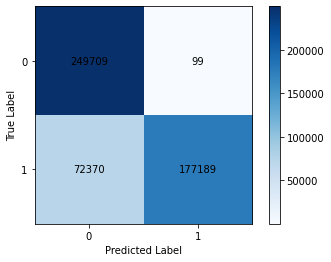

In [68]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# add labels to the plot
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# add values to the cells of the heatmap
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

# display the plot
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


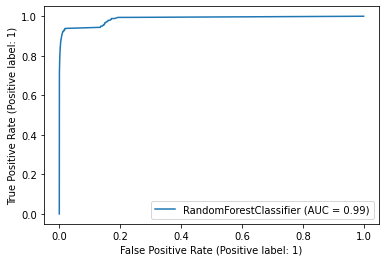

In [69]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, x_test_scaled, y_test);

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


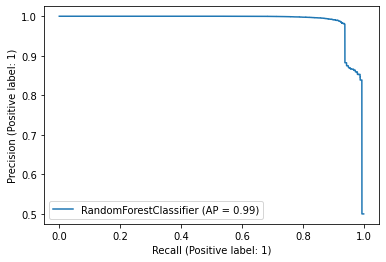

In [70]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf, x_test_scaled, y_test);